In [13]:
from fastai.vision.core import *
from fastai.vision.data import *
from fastbook import *
import os

PATH = '../data/'
DATA_PATH = PATH + 'full/'
OUT_PATH = '../data/outputs/'
os.listdir(DATA_PATH)

['papagaio-verdadeiro', 'principe', 'tucanucu']

In [14]:
# Create DataBlock instance
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(512))


Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


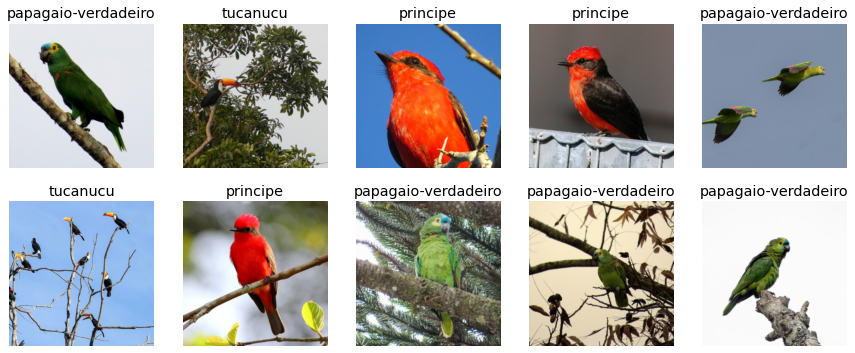

In [3]:

# Load data
dls = data.dataloaders(DATA_PATH)

# Display pictures and labels
dls.valid.show_batch(max_n=10, nrows=2)

In [4]:
# Resize images to 224 pixels
# data = data.new(
#     item_tfms=RandomResizedCrop(224, min_scale=0.5),
#     batch_tfms=aug_transforms())
# dls = data.dataloaders(DATA_PATH)
# # Display pictures and labels
# dls.valid.show_batch(max_n=10, nrows=2)

In [5]:
# Create learner with resnet 18 layers 
learn = cnn_learner(dls, resnet18, metrics=error_rate)

In [6]:
# Train for 4 epochs
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.360729,0.059626,0.023588,1:03:08


epoch,train_loss,valid_loss,error_rate,time
0,0.042049,0.017779,0.006433,1:11:41
1,0.023561,0.024199,0.006433,1:16:22
2,0.007240,0.016947,0.004289,1:13:28
3,0.004021,0.014567,0.002859,1:09:01


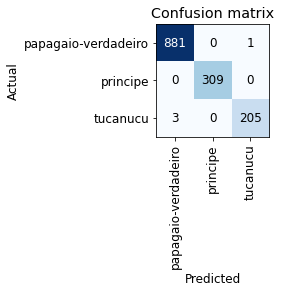

In [7]:
# Check confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


In [10]:
# Export model
learn.export(OUT_PATH + 'gmodel.pkl')

In [11]:
# import model
learn_inf = load_learner(OUT_PATH + 'gmodel.pkl')

In [16]:

learn_inf.predict(PATH + 'inference/DSC00986.JPG' )

('tucanucu', TensorBase(2), TensorBase([2.4285e-12, 2.4683e-05, 9.9998e-01]))